In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset shape: (400, 4096)
Labels shape: (400,)


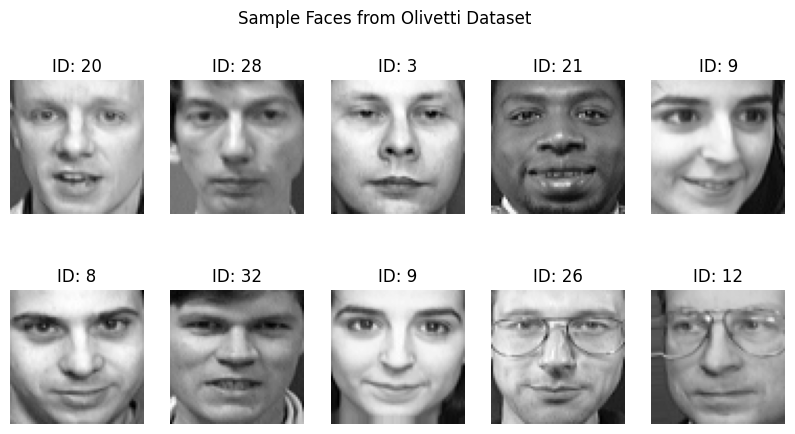

In [ ]:

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = faces.data, faces.target

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)


fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap="gray")
    ax.set_title(f"ID: {y[i]}")
    ax.axis("off")
plt.suptitle("Sample Faces from Olivetti Dataset")
plt.show()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Transformed shape:", X_pca.shape)


Original shape: (400, 4096)
Transformed shape: (400, 400)


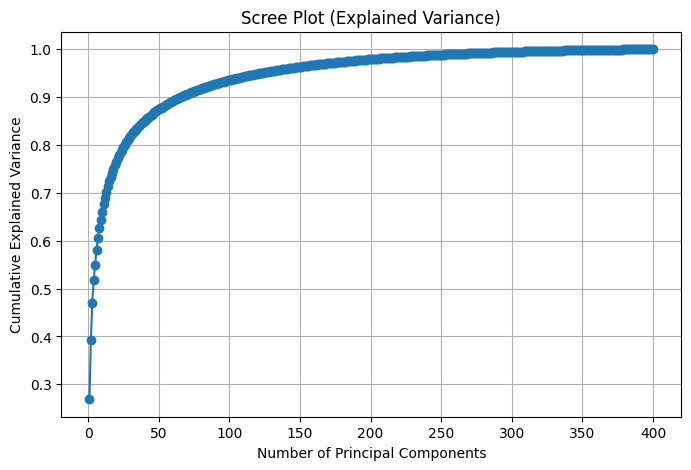

Number of components to retain 95% variance: 123


In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Explained Variance)")
plt.grid(True)
plt.show()


n_components_95 = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components_95}")


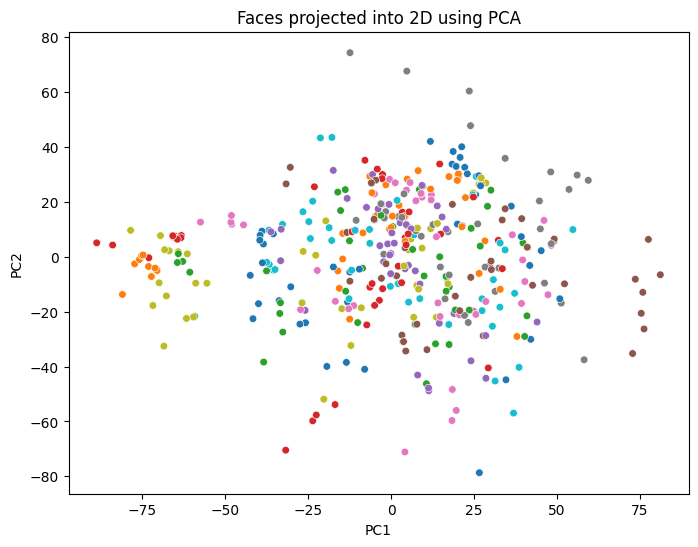

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette="tab10", legend=False, s=30)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Faces projected into 2D using PCA")
plt.show()


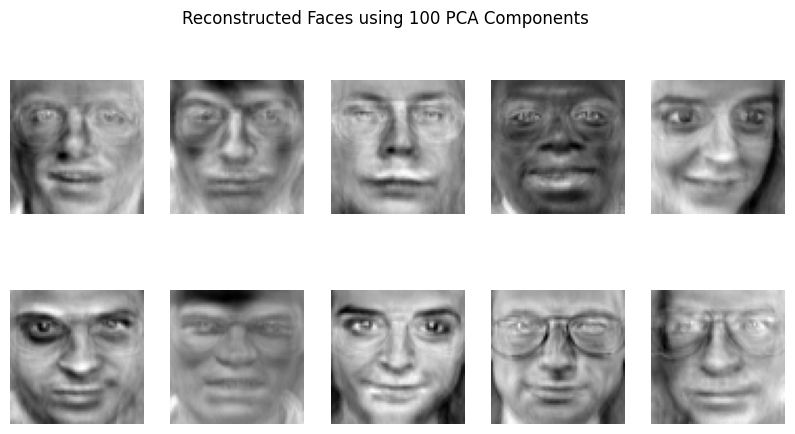

In [ ]:

pca_reduced = PCA(n_components=100)
X_reduced = pca_reduced.fit_transform(X_scaled)
X_reconstructed = pca_reduced.inverse_transform(X_reduced)

fig, axes = plt.subplots(2, 5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_reconstructed[i].reshape(64,64), cmap="gray")
    ax.axis("off")
plt.suptitle("Reconstructed Faces using 100 PCA Components")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


clf = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_no_pca = accuracy_score(y_test, y_pred)

X_train_pca = pca_reduced.fit_transform(X_train)
X_test_pca = pca_reduced.transform(X_test)

clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA (100 comps):", acc_pca)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy without PCA: 0.95
Accuracy with PCA (100 comps): 0.9625


Key Questions / Analysis / Interpretation to be Evaluated

1. How does PCA reduce the dimensionality of image data?
- PCA projects high-dimensional data (4096 pixels) onto fewer orthogonal axes (principal components) that capture maximum variance.
Thus, instead of using all pixel values, only key components (like "eigenfaces") are used.

2. What percentage of variance is retained by top components?
- From the scree plot, about 100–150 components retain ~95% variance, reducing dimensionality from 4096 to ~100 while keeping most information.

3. How are eigenvectors and eigenvalues used in PCA?
- Eigenvectors → directions of maximum variance (principal components).
- Eigenvalues → amount of variance captured by each eigenvector.
- Together, they form the PCA transformation matrix.

4. How do lower-dimensional visualizations help in understanding data clusters?
- The 2D PCA plot reveals natural clusters of faces by identity.
- It allows visual inspection of similarities/differences in high-dimensional data.

5. What are the trade-offs between compression and information loss?
- Fewer components → faster computation, less storage, easier visualization.
- But too few components → lose details, blurred reconstructions, reduced classification accuracy.
- Balance is key (e.g., 100 components = good compromise).

Supplementary Problems

Original shape: (70000, 784)
Reduced shape: (70000, 50)


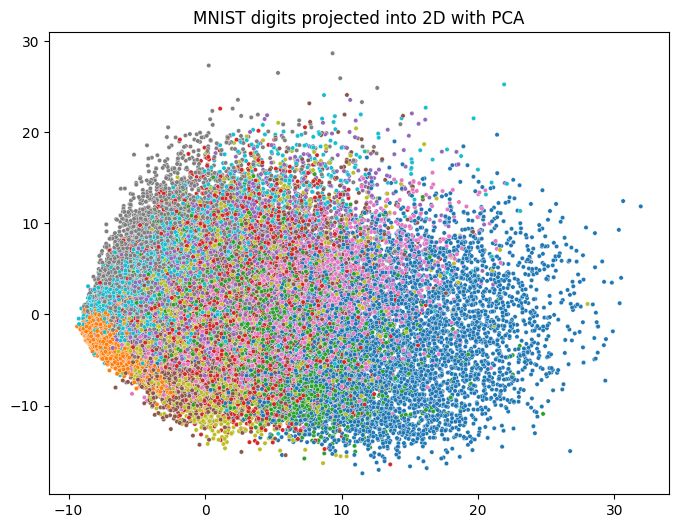

In [ ]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X_mnist, y_mnist = mnist.data, mnist.target.astype(int)


X_mnist_scaled = StandardScaler().fit_transform(X_mnist)


pca_mnist = PCA(n_components=50)
X_mnist_pca = pca_mnist.fit_transform(X_mnist_scaled)

print("Original shape:", X_mnist.shape)
print("Reduced shape:", X_mnist_pca.shape)

pca_mnist_2d = PCA(n_components=2)
X_mnist_2d = pca_mnist_2d.fit_transform(X_mnist_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_mnist_2d[:,0], y=X_mnist_2d[:,1], hue=y_mnist, palette="tab10", s=10, legend=False)
plt.title("MNIST digits projected into 2D with PCA")
plt.show()
